In [2]:
# Import Libraries
from ta import add_all_ta_features
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\imaia\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\imaia\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [205]:
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/price.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
stock_price = pd.read_csv(io.StringIO(download.decode('utf-8')))

stock_price = stock_price[stock_price['symbol'] == "FB"]
stock_price['date'] = pd.DatetimeIndex(stock_price['label'])

stock_price['date'] = stock_price['date'].dt.strftime('%Y-%m-%d')

stock_price = stock_price.loc[(stock_price['date'] >= '2020-04-01')
                     & (stock_price['date'] <= '2021-04-01')]

stock_price.columns

Index(['change', 'changeOverTime', 'changePercent', 'close', 'fClose', 'fHigh',
       'fLow', 'fOpen', 'fVolume', 'high', 'id', 'key', 'label', 'low',
       'marketChangeOverTime', 'open', 'subkey', 'symbol', 'uClose', 'uHigh',
       'uLow', 'uOpen', 'uVolume', 'updated', 'volume', 'date'],
      dtype='object')

In [206]:
stock_price_sub = stock_price[["date", "open", "high", "low", "close", "volume"]]

stock_price_sub.head()

,date,open,high,low,close,volume
1258,2021-04-01,298.4000,302.40,296.60,298.66,17615980
1259,2021-03-31,289.9900,296.50,288.61,294.53,19498157
1260,2021-03-30,289.8300,292.47,286.70,288.00,17474537
1261,2021-03-29,285.7700,293.18,284.70,290.82,21718831
1262,2021-03-26,278.3018,284.50,277.77,283.02,17629185


In [207]:
technical_data = add_all_ta_features(stock_price_sub, open="open", high="high", low="low", close="close",
                                     volume="volume", fillna=True)

technical_data.shape

C:\Users\imaia\Anaconda3\lib\site-packages\ta\wrapper.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high=df[high], low=df[low], close=df[close], volume=df[volume], fillna=fillna
C:\Users\imaia\Anaconda3\lib\site-packages\ta\wrapper.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close=df[close], volume=df[volume], fillna=fillna
C:\Users\imaia\Anaconda3\lib\site-packages\ta\wrapper.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

(253, 89)

In [208]:
technical_data = technical_data.dropna(axis=1)
technical_data.shape

(253, 89)

In [209]:
technical_data = technical_data.sort_values(by='date')
technical_data.iloc[:, 30:50].tail()


,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff
1262,1.0,277.77,302.4,290.085,8.463743,0.213155,0.0,-2.369804,-0.885041,-1.484763,291.0060,291.0060,293.674121,296.043925,0.0,0.0,0.0,0.119366,0.524695,-0.405329
1261,0.0,284.70,302.4,293.550,6.040904,0.345763,0.0,-1.474605,-0.513850,-0.960755,293.0025,293.0025,295.611234,297.085839,0.0,0.0,0.0,0.137210,0.412157,-0.274946
1260,0.0,286.70,302.4,294.550,5.345045,0.082803,0.0,-1.104739,-0.273661,-0.831078,293.7300,293.7300,296.482367,297.587106,0.0,0.0,0.0,0.058573,0.348925,-0.290352
1259,0.0,288.61,302.4,295.505,4.649438,0.429297,0.0,-0.329459,-0.065892,-0.263567,296.5950,296.5950,298.024615,298.354074,0.0,0.0,0.0,0.001673,0.230689,-0.229016
1258,0.0,296.60,302.4,299.500,1.942008,0.355172,0.0,0.000000,0.000000,0.000000,298.6600,298.6600,298.660000,298.660000,0.0,0.0,0.0,0.000000,0.000000,0.000000


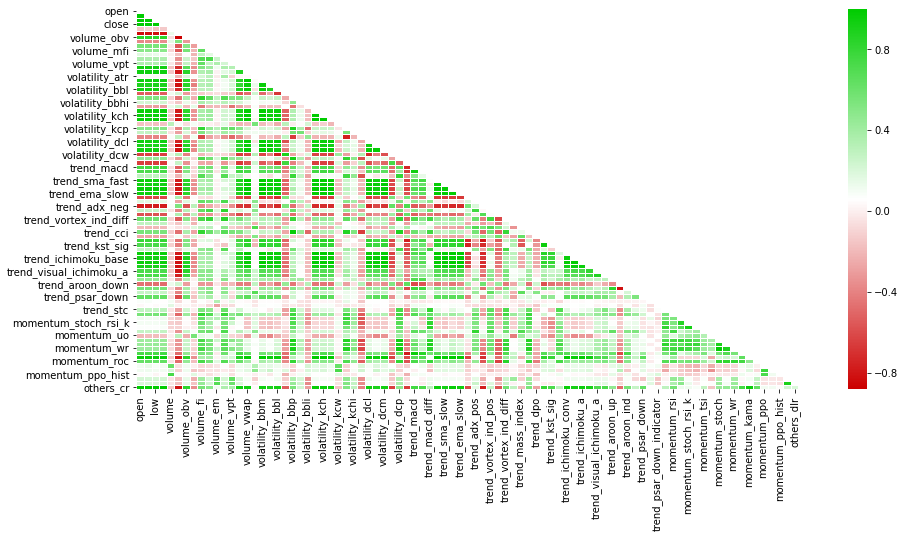

In [210]:
import matplotlib.colors as colors

# This dictionary defines the colormap
cdict = {'green':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'red': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

# Create the colormap using the dictionary
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)

matrix = np.triu(technical_data.iloc[:,:].corr())

fig, ax1 = plt.subplots(figsize=(15,7))

sns.heatmap(technical_data.iloc[:,:].corr(), linewidths=.5, cmap=GnRd, mask = matrix)

plt.show()

In [267]:
technical_data.iloc[:,1:30].corr().head()

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,...,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi
open,1.000000,0.995203,0.995057,0.989030,-0.148151,-0.830173,0.831558,-0.380508,0.546463,0.491352,...,-0.532174,0.533355,0.221054,-0.285444,0.958322,0.956931,0.957539,-0.161055,0.486221,0.276767
high,0.995203,1.000000,0.995118,0.994756,-0.105415,-0.824312,0.836743,-0.372089,0.553333,0.487939,...,-0.527543,0.535806,0.219945,-0.286907,0.962909,0.962351,0.961243,-0.144641,0.491757,0.284178
low,0.995057,0.995118,1.000000,0.995472,-0.173650,-0.823972,0.833926,-0.376234,0.547693,0.488070,...,-0.534775,0.535785,0.209668,-0.295626,0.964239,0.962191,0.964130,-0.175844,0.490567,0.277188
close,0.989030,0.994756,0.995472,1.000000,-0.138008,-0.812610,0.838013,-0.353896,0.567739,0.492286,...,-0.532852,0.550920,0.225504,-0.292980,0.963425,0.962163,0.962495,-0.159608,0.509056,0.291880
volume,-0.148151,-0.105415,-0.173650,-0.138008,1.000000,0.129189,-0.059978,0.149194,-0.013989,-0.090661,...,0.117030,-0.113591,-0.034633,0.135626,-0.135439,-0.121209,-0.150042,0.314201,-0.059538,-0.048313


In [269]:

# Find the attributes that have a correlated of greater than 0.5
correlated = technical_data.corr()
p_indices = np.where(correlated > 0.5)
p_indices = [(correlated.index[x], correlated.columns[y]) for x, y in zip(*p_indices)
                                        if x != y and x < y]

n_indices = np.where(correlated < -0.5)
n_indices = [(correlated.index[x], correlated.columns[y]) for x, y in zip(*n_indices)
                                        if x != y and x < y]

significant_indicators = set()

# find the attributes that are directly correlated to the opening price
for i in p_indices:
    if i[0] == 'open':
        significant_indicators.add(i[1])
    else:
        pass

for i in n_indices:
    if i[0] == 'open':
        significant_indicators.add(i[1])
    else:
        pass

# Remove non technical attributes
for i in ["high", "low", "close"]:
    significant_indicators.remove(i)
    
significant_indicators.add("open")
significant_indicators.add("date")

print(list(significant_indicators))
print(len(list(significant_indicators)))

significant_indicators = list(significant_indicators)


['others_cr', 'volatility_kch', 'trend_vortex_ind_neg', 'trend_cci', 'trend_ichimoku_conv', 'volatility_bbp', 'volatility_ui', 'trend_adx_neg', 'volume_vwap', 'trend_ema_slow', 'volume_nvi', 'volatility_bbh', 'trend_macd', 'volume_adi', 'trend_visual_ichimoku_a', 'trend_kst', 'trend_ichimoku_base', 'trend_ichimoku_a', 'volatility_bbw', 'trend_psar_down', 'volatility_dcl', 'volatility_kcc', 'trend_kst_sig', 'momentum_kama', 'trend_vortex_ind_diff', 'volatility_bbl', 'date', 'volatility_bbm', 'momentum_ao', 'volatility_kcl', 'open', 'volume_fi', 'volume_obv', 'volatility_dcw', 'volatility_dcm', 'momentum_roc', 'volatility_dch', 'trend_sma_slow', 'trend_ema_fast', 'trend_aroon_ind', 'trend_macd_signal', 'momentum_rsi', 'trend_adx', 'trend_visual_ichimoku_b', 'trend_ichimoku_b', 'trend_sma_fast']
46


In [270]:
cleaned = technical_data[significant_indicators]

cleaned.shape

(253, 46)

In [271]:
cleaned.head()

,others_cr,volatility_kch,trend_vortex_ind_neg,trend_cci,trend_ichimoku_conv,volatility_bbp,volatility_ui,trend_adx_neg,volume_vwap,trend_ema_slow,...,volatility_dch,trend_sma_slow,trend_ema_fast,trend_aroon_ind,trend_macd_signal,momentum_rsi,trend_adx,trend_visual_ichimoku_b,trend_ichimoku_b,trend_sma_fast
1510,-46.561307,174.290787,0.938436,-122.266923,166.0275,0.109660,13.750850,36.441485,169.865728,181.197441,...,196.91,182.746154,168.979655,-88.0,-11.517621,28.116243,43.803795,225.42,196.02,170.103333
1509,-47.033416,175.734120,0.980631,-146.024431,166.0275,0.067826,13.982737,38.483473,171.621146,182.925237,...,209.69,184.775000,170.685047,-92.0,-11.342580,26.226544,43.753733,225.42,196.02,171.656667
1508,-48.376080,177.577000,1.029504,-185.509778,166.0275,-0.056858,13.978827,40.984198,173.332592,184.904056,...,209.69,186.890000,172.956874,-96.0,-11.118177,20.722902,43.137840,225.42,196.02,172.707500
1507,-44.569075,179.661667,1.055881,-134.176602,169.8675,0.120810,13.558694,39.402265,176.018494,187.361980,...,209.69,189.040769,176.370851,-96.0,-10.910926,25.788163,41.759347,225.42,199.86,175.049167
1506,-43.470836,180.405280,0.929884,-101.286440,173.6175,0.161850,13.502437,36.029637,178.283145,189.106938,...,210.38,190.561923,178.338279,-92.0,-10.890875,27.594962,40.710506,225.42,203.61,176.680833


In [272]:
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cleaned = cleaned.drop(['date'], axis = 1)
# Choosing between Standardization or normalization
#sc = StandardScaler()
sc = MinMaxScaler()
 
DataScaler = sc.fit(cleaned)
transformed = DataScaler.transform(cleaned)

transformed = pd.DataFrame(transformed, columns = cleaned.columns)
type(transformed)

pandas.core.frame.DataFrame

In [273]:
transformed.shape

(253, 45)

In [274]:
y = transformed[['open']]
x = transformed.drop(['open'], axis = 1)


In [275]:
y = y.to_numpy()
x = x.to_numpy()

In [276]:
x.shape

(253, 44)

In [292]:
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = x.shape[0]

TimeSteps = 5  # next day's Price Prediction is based on last how many past day's prices
FutureTimeSteps = 1 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = x[i-TimeSteps:i]
    y_sample = y[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data = np.array(X_samples)
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 44)
print('\n#### Input Data shape ####')
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data = np.array(y_samples)
y_data = y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(247, 5, 44)

#### Output Data shape ####
(247, 1)


In [293]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

In [294]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [295]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 5
Number of Features: 44


In [296]:
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
185/185 [==============================] - 2s 9ms/step - loss: 0.4927
Epoch 2/100
185/185 [==============================] - 0s 636us/step - loss: 0.4461
Epoch 3/100
185/185 [==============================] - 0s 690us/step - loss: 0.1923
Epoch 4/100
185/185 [==============================] - 0s 652us/step - loss: 0.0206
Epoch 5/100
185/185 [==============================] - 0s 658us/step - loss: 0.0051
Epoch 6/100
185/185 [==============================] - 0s 631us/step - loss: 0.0033
Epoch 7/100
185/185 [==============================] - 0s 625us/step - loss: 0.0025
Epoch 8/100
185/185 [==============================] - 0s 625us/step - loss: 0.0022
Epoch 9/100
185/185 [==============================] - 0s 663us/step - loss: 0.0020
Epoch 10/100
185/185 [==============================] - 0s 663us/step - loss: 0.0018
Epoch 11/100
185/185 [==============================] - 0s 636us/step - loss: 0.0017
Epoch 12/100
185/185 [==============================] - 0s 658us/step - loss

In [283]:
X_train

array([[[0.63681293, 0.69485989, 0.87281388, ..., 0.61521328,
         0.72941631, 0.69997018],
        [0.67214319, 0.70421572, 0.7934559 , ..., 0.61521328,
         0.73419985, 0.71696658],
        [0.68550057, 0.70791548, 0.78542093, ..., 0.61521328,
         0.77386935, 0.73078668],
        ...,
        [0.7377947 , 0.75411826, 0.80625375, ..., 0.57741631,
         0.77386935, 0.74786735],
        [0.69778935, 0.75753759, 0.81694379, ..., 0.57741631,
         0.77386935, 0.75699432],
        [0.69418286, 0.76153058, 0.85155047, ..., 0.57741631,
         0.77386935, 0.76960873]],

       [[0.74013224, 0.76830978, 0.67923256, ..., 0.71955994,
         0.7917472 , 0.75272253],
        [0.69558539, 0.75427823, 0.8336826 , ..., 0.75168737,
         0.7917472 , 0.75853709],
        [0.72016296, 0.75521401, 0.78549265, ..., 0.77234071,
         0.7917472 , 0.768416  ],
        ...,
        [0.75068457, 0.76807265, 0.76433828, ..., 0.85697894,
         0.7917472 , 0.76265655],
        [0.7

1504    2020-04-09
1503    2020-04-13
1502    2020-04-14
1501    2020-04-15
1500    2020-04-16
           ...    
1262    2021-03-26
1261    2021-03-29
1260    2021-03-30
1259    2021-03-31
1258    2021-04-01
Name: date, Length: 247, dtype: object
(247,)
(247,)


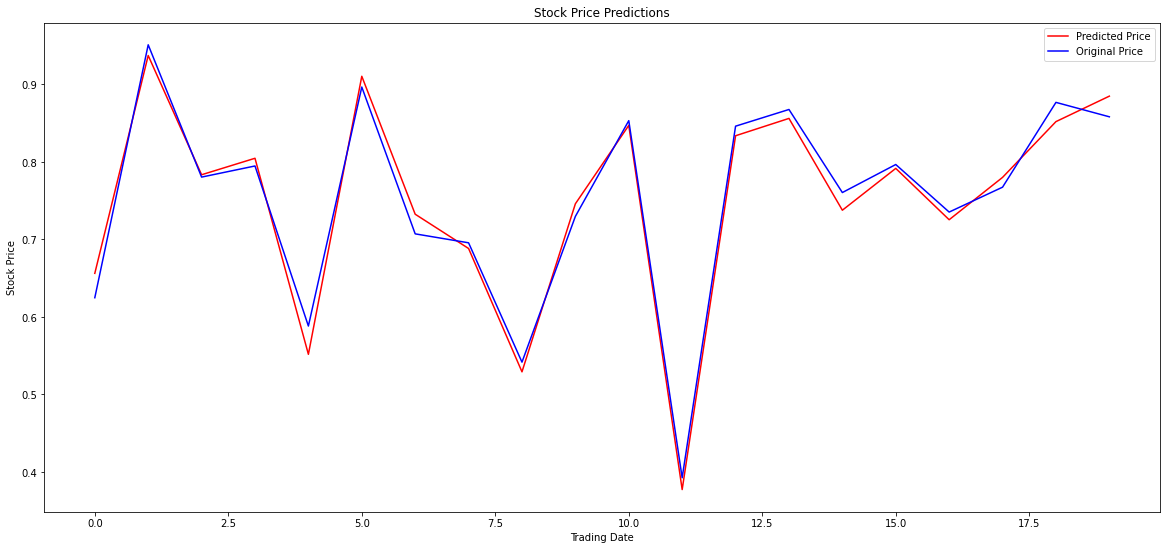

In [299]:

# Generating predictions on full data
TrainPredictions = regressor.predict(X_train)
TestPredictions = regressor.predict(X_test)

 
FullDataPredictions = np.append(TrainPredictions, TestPredictions)
FullDataOrig = np.append(y_train, y_test)
print(technical_data['date'].iloc[TimeSteps+1:])
print(FullDataPredictions.shape)
print(FullDataOrig.shape)
 
# plotting the full data
plt.plot(FullDataPredictions[20:40], color = 'red', label = 'Predicted Price')
plt.plot(FullDataOrig[20:40] , color = 'blue', label = 'Original Price')
 
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(9)
plt.show()

In [285]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [300]:
y_pred = regressor.predict(X_test)

percentages = [1,2,3]

total = len(y_test)

for percent in percentages:
    
    correct = 0
    
    for i in range(len(y_test)):
        upper = y_test[i] + (( percent / 100) * y_test[i] )
        lower = y_test[i] - (( percent / 100) * y_test[i] )
        if y_pred[i] < upper and y_pred[i] > lower:
            correct = correct + 1
        else:
            pass
        
    print("{}% of the predictions were {}% away from actual price".format(round((correct/total)*100,2),percent))
    

29.03% of the predictions were 1% away from actual price
46.77% of the predictions were 2% away from actual price
58.06% of the predictions were 3% away from actual price


In [5]:
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/price.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
stock_price = pd.read_csv(io.StringIO(download.decode('utf-8')))

print(stock_price.shape)
technical_data = add_all_ta_features(stock_price, open="open", high="high", low="low", close="close",
                                     volume="volume", fillna=True)

print(technical_data.shape)

(12588, 25)


C:\Users\imaia\Anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\imaia\Anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


(12588, 108)


In [6]:
technical_data.to_csv (r'C:\Users\imaia\Desktop\Stats170A\Capstone\technical_data.csv', index = False, header=True)
